In [10]:
# coding: utf-8

# 간단한 XOR Table을 학습하는 NN을 구성하는 문제입니다.
# 
#  1-Layer, 2-Layer model을 각각 구성하여 XOR 결과를 비교합니다.
#  1-Layer, 2-Layer의 model을 feedforward network와 Backpropagation을 이용하여 학습시킵니다.
#  주어진 양식을 활용해 주시며, scale, 차원의 순서, hyper parameter등은 결과가 잘 나오는 방향으로 Tuning하셔도 무방합니다.
#  Layer의 Activation 함수인 Tanh는 49~52번째 줄의 함수를 사용하시면 됩니다.
# 


import numpy as np
import random
import matplotlib.pyplot as plt



In [11]:

# Hyper parameters
## 학습의 횟수와 Gradient update에 쓰이는 learning rate입니다.
## 다른 값을 사용하여도 무방합니다.
epochs = 1000
learning_rate = 0.05


# Weight Setting
## 학습에 사용되는 weight들의 초기값을 선언해 줍니다. random이 아닌 다른 값을 사용하여도 무방합니다.
## 현재 weight변수는 2-layer 기준으로 설정되어있습니다.
## 1-layer의 경우 W1과 b1을 문제에 맞게 바꿔 진행해주시면 됩니다. (방법은 자유)
#W1 = np.random.randn(2,2)
#W2 = np.random.randn(2,1)
#b1 = np.random.randn(1,2)
#b2 = np.random.randn(1,1)
W1 = np.random.randn(2,1)
b1 = np.random.randn(1,1)

In [12]:

# Input data setting
## XOR data 
## 입력 데이터들, XOR Table에 맞게 정의해놓았습니다.
train_inp = np.array([[0, 0], [0, 1], [1, 0], [1, 1]])
train_out = np.array([0, 1, 1, 0])


##-----------------------------------##
##------- Activation Function -------##
##-----------------------------------##
def tanh(x):
    numerator = np.exp(x) - np.exp(-x)
    denominator = np.exp(x) + np.exp(-x)
    return numerator/denominator



In [13]:

# ----------------------------------- #
# --------- Training Step ----------- #
# ----------------------------------- #
# 학습이 시작됩니다.
# epoch 사이즈만큼 for 문을 돌며 학습됩니다.
# 빈 칸을 채워 Weight과 bias를 학습(update)하는 신경망을 설계하세요.
# 양식의 모든 내용을 무조건 따를 필요는 없습니다. 각자에게 편하게 수정하셔도 좋습니다.

errors = []
for epoch in range(epochs):
        
    # 데이터 4가지 중 랜덤으로 하나 선택
    for batch in range(4):
        idx = random.randint(0,3)

        # 입력 데이터 xin과 해당하는 정답 ans 불러오기
        xin = train_inp[idx].reshape(1,2)
        ans = train_out[idx]
        
        
        # Layer에 맞는 Forward Network 구성
        # HINT: 1-layer의 경우 net1만, 2-layer의 경우 net2까지 사용하시면 됩니다.
        net1 = tanh(np.matmul(xin,W1)+b1)
#        net2 = tanh(np.matmul(net1,W2)+b2)

        # Mean Squared Error (MSE)로 loss 계산
#        predictions = 1 if net1 > 0.5 else 0
        predictions = net1
        targets = ans
        loss = np.mean((predictions - targets) ** 2)
        
        
        
        # delta matrix initialization(Zero 값이 아닌 다른 방법으로 이용하셔도 됩니다.)
#        delta_W1 = np.zeros((2,2))
#        delta_W2 = np.zeros((2,1))
#        delta_b1 = np.zeros((1,2))
#        delta_b2 = np.zeros((1,1))
        delta_W1 = 
        delta_b1 = 
        
        
        # Backpropagation을 통한 Weight의 Gradient calculation(update)
#        delta_W1 = 
#        delta_W2 = 
#        delta_b1 =
#        delta_b2 = 
        delta_W1 = np.matmul(xin.T, 2 * (predictions - targets) * (1 - net1**2))
        delta_b1 = 2 * (predictions - targets) * (1 - net1**2)       

    
        # 각 weight의 update 반영
        W1 = W1 - learning_rate * delta_W1
#        W2 = W2 - learning_rate * delta_W2
        
        b1 = b1 - learning_rate * delta_b1
#        b2 = b2 - learning_rate * delta_b2
        
        
    ## 500번째 epoch마다 loss를 프린트 합니다.
    if epoch%500 == 0:
        print("epoch[{}/{}] loss: {:.4f}".format(epoch,epochs,float(loss)))
        
    ## plot을 위해 값 저장
    errors.append(loss)



## 학습이 끝난 후, loss를 확인합니다.
loss =  np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")



SyntaxError: invalid syntax (1788255404.py, line 39)

epoch [0/2000] loss: 0.0000
epoch [500/2000] loss: 0.0354
epoch [1000/2000] loss: 0.0793
epoch [1500/2000] loss: 0.0271
input:  [[0 0]] , answer:  0 , pred: 0.0280
input:  [[0 1]] , answer:  1 , pred: 0.8999
input:  [[1 0]] , answer:  1 , pred: 0.9164
input:  [[1 1]] , answer:  0 , pred: 0.9952


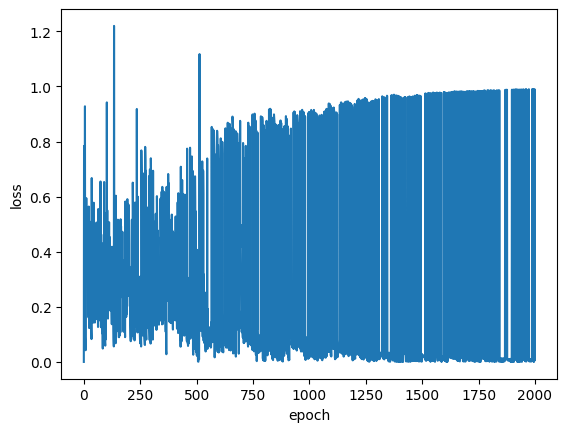

In [25]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
epochs = 2000
learning_rate = 0.1

# Initialize weights and biases
W1 = np.random.randn(2, 1)  # First layer weights
b1 = np.zeros((1, 1))  # First layer biases

errors = []
for epoch in range(epochs):
    # 데이터 4가지 중 랜덤으로 하나 선택
    idx = np.random.randint(4)

    # 입력 데이터 xin과 해당하는 정답 ans 불러오기
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    # Forward Pass
    net1 = tanh(np.matmul(xin, W1) + b1)

    # Mean Squared Error (MSE)로 loss 계산
    predictions = net1
    targets = ans
    loss = np.mean((predictions - targets) ** 2)

    # Backpropagation을 통한 Weight의 Gradient calculation(update)
    delta_W1 = np.matmul(xin.T, 2 * (predictions - targets) * (1 - net1**2))
    delta_b1 = 2 * (predictions - targets) * (1 - net1**2)

    # 각 weight의 update 반영
    W1 -= learning_rate * delta_W1
    b1 -= learning_rate * delta_b1

    # 500번째 epoch마다 loss를 프린트합니다.
    if epoch % 500 == 0:
        print("epoch [{}/{}] loss: {:.4f}".format(epoch, epochs, float(loss)))

    # plot을 위해 값 저장
    errors.append(loss)

for idx in range(4):
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    net1 = tanh(np.matmul(xin, W1) + b1)

    pred = net1.item() 

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))

# 학습이 끝난 후, loss를 확인합니다.
loss = np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()


np.savetxt("layer1_W1.txt", W1, fmt="%s")
np.savetxt("layer1_b1.txt", b1, fmt="%s")


epoch [0/2000] loss: 0.3489
epoch [500/2000] loss: 0.0224
epoch [1000/2000] loss: 0.0048
epoch [1500/2000] loss: 0.0021
input:  [[0 0]] , answer:  0 , pred: 0.0066
input:  [[0 1]] , answer:  1 , pred: 0.9636
input:  [[1 0]] , answer:  1 , pred: 0.9627
input:  [[1 1]] , answer:  0 , pred: 0.0112


C:\Users\pook0\AppData\Local\Temp\ipykernel_16084\402310834.py:60: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))


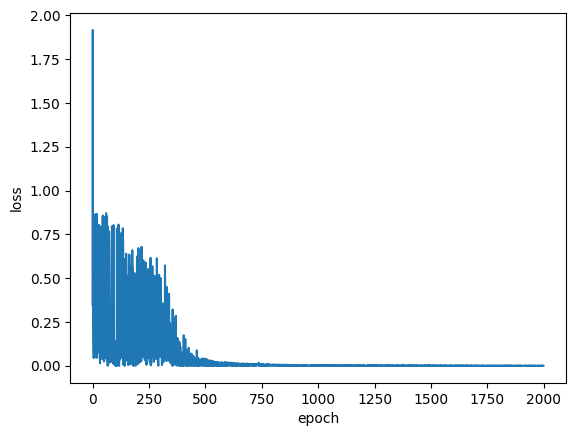

In [26]:
import numpy as np
import matplotlib.pyplot as plt

# Hyperparameters
epochs = 2000
learning_rate = 0.1

# Initialize weights and biases
W1 = np.random.randn(2, 4)  # First layer weights
b1 = np.zeros((1, 4))  # First layer biases
W2 = np.random.randn(4, 1)  # Second layer weights
b2 = np.zeros((1, 1))  # Second layer biases

errors = []
for epoch in range(epochs):
    # 데이터 4가지 중 랜덤으로 하나 선택
    idx = np.random.randint(4)

    # 입력 데이터 xin과 해당하는 정답 ans 불러오기
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    # Forward Pass
    net1 = tanh(np.matmul(xin, W1) + b1)
    net2 = tanh(np.matmul(net1, W2) + b2)

    # Mean Squared Error (MSE)로 loss 계산
    predictions = net2
    targets = ans
    loss = np.mean((predictions - targets) ** 2)

    # Backpropagation을 통한 Weight의 Gradient calculation(update)
    delta_W2 = np.matmul(net1.T, 2 * (predictions - targets) * (1 - net2**2))
    delta_b2 = 2 * (predictions - targets) * (1 - net2**2)
    delta_W1 = np.matmul(xin.T, np.matmul(2 * (predictions - targets) * (1 - net2**2), W2.T) * (1 - net1**2))
    delta_b1 = np.matmul(2 * (predictions - targets) * (1 - net2**2), W2.T) * (1 - net1**2)

    # 각 weight의 update 반영
    W2 -= learning_rate * delta_W2
    b2 -= learning_rate * delta_b2
    W1 -= learning_rate * delta_W1
    b1 -= learning_rate * delta_b1

    # 500번째 epoch마다 loss를 프린트합니다.
    if epoch % 500 == 0:
        print("epoch [{}/{}] loss: {:.4f}".format(epoch, epochs, float(loss)))

    # plot을 위해 값 저장
    errors.append(loss)

for idx in range(4):
    xin = train_inp[idx].reshape(1, 2)
    ans = train_out[idx]

    net1 = tanh(np.matmul(xin, W1) + b1)
    net2 = tanh(np.matmul(net1, W2) + b2)

    pred = net2

    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))


# 학습이 끝난 후, loss를 확인합니다.
loss = np.array(errors)
plt.plot(loss.reshape(epochs))
plt.xlabel("epoch")
plt.ylabel("loss")
plt.show()

np.savetxt("layer2_W1.txt", W1, fmt="%s")
np.savetxt("layer2_b1.txt", b1, fmt="%s")
np.savetxt("layer2_W2.txt", W2, fmt="%s")
np.savetxt("layer2_b2.txt", b2, fmt="%s")    


In [20]:
#-----------------------------------#
#--------- Testing Step ------------#
#-----------------------------------#

for idx in range(4):
    xin = train_inp[idx].reshape(1,2)
    ans = train_out[idx]
    
    # 1-layer의 경우 net2는 사용하지 않아도 됩니다, 위에서 본인이 설정한 변수대로 진행하시면 됩니다.
    net1 = tanh(np.matmul(xin,W1)+b1)
    #net2 = tanh(np.matmul(net1,W2)+b2)

    pred = net1 # ans와 가까울 수록 잘 학습된 것을 의미합니다.
    
    print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))
    


#-----------------------------------#
#--------- Weight Saving -----------#
#-----------------------------------#

# weight, bias를 저장하는 부분입니다.

    #layer 1개인 경우
#np.savetxt("layer1_weight",(W1, b1),fmt="%s")

    #layer 2개인 경우
#np.savetxt("layer2_weight",(W1, W2, b1, b2),fmt="%s")

input:  [[0 0]] , answer:  0 , pred: 0.4097
input:  [[0 1]] , answer:  1 , pred: 0.7628
input:  [[1 0]] , answer:  1 , pred: -0.5337
input:  [[1 1]] , answer:  0 , pred: -0.0276


C:\Users\pook0\AppData\Local\Temp\ipykernel_22256\1616009955.py:15: DeprecationWarning: Conversion of an array with ndim > 0 to a scalar is deprecated, and will error in future. Ensure you extract a single element from your array before performing this operation. (Deprecated NumPy 1.25.)
  print("input: ", xin, ", answer: ", ans, ", pred: {:.4f}".format(float(pred)))
